### Treadmill Purchasing Data from 'Cardio Good Fitness'

So I've received some data from a company that want me to find any insights into their customer data...

Lets start with importing pandas and the csv file:

In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('CardioGoodFitness.csv')

Next, we can have a look at the dataset:

In [8]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


Lets use the `.info()` method to view a breakdown of the columns, non-null counts and data types:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The `.describe(include=['O'])` method gives some interesting information on non-numerical columns:

In [20]:
df.describe(include=['O'])

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


Next, using `.groupby()` I can split the information given by product type. This gives more insight, such that the top product TM195 is equally split in Male and Female consumers (40 of 80 are Male). The TM798 product Gender distribution is very different, with 33 of 40 consumers being Male (82.5%):

In [25]:
df.groupby(by='Product').describe(include = 'O')

Gender                   MaritalStatus                       
         count unique   top freq         count unique        top freq
Product                                                              
TM195       80      2  Male   40            80      2  Partnered   48
TM498       60      2  Male   31            60      2  Partnered   36
TM798       40      2  Male   33            40      2  Partnered   23

Next, we can see that mean Age is pretty similar across products, whereas the mean time in Education and mean Miles is higher for TM798 customers:

In [35]:
df.groupby(by='Product').describe()

Age                                                  Education  \
        count   mean       std   min    25%   50%    75%   max     count   
Product                                                                    
TM195    80.0  28.55  7.221452  18.0  23.00  26.0  33.00  50.0      80.0   
TM498    60.0  28.90  6.645248  19.0  24.00  26.0  33.25  48.0      60.0   
TM798    40.0  29.10  6.971738  22.0  24.75  27.0  30.25  48.0      40.0   

                    ...   Income           Miles                               \
              mean  ...      75%       max count        mean        std   min   
Product             ...                                                         
TM195    15.037500  ...  53439.0   68220.0  80.0   82.787500  28.874102  38.0   
TM498    15.116667  ...  53439.0   67083.0  60.0   87.933333  33.263135  21.0   
TM798    17.325000  ...  90886.0  104581.0  40.0  166.900000  60.066544  80.0   

                                     
           25%    50%    75%    max  
Product                              
TM195     66.0   85.0   94.0  188.0  
TM498     64.0   85.0  106.0  212.0  
TM798    120.0  160.0  200.0  360.0  

[3 rows x 48 columns]

Its difficult to really get much insight from the above table, so lets start visualising the data using Seaborn and MatPlotLib.

In [37]:
import seaborn as sns

import matplotlib.pyplot as plt

Next, we'll use `.pairplot` to compare multiple variables, using 'Product' as the 'hue' to indicate where different product consumers fall:

<Figure size 432x288 with 0 Axes>

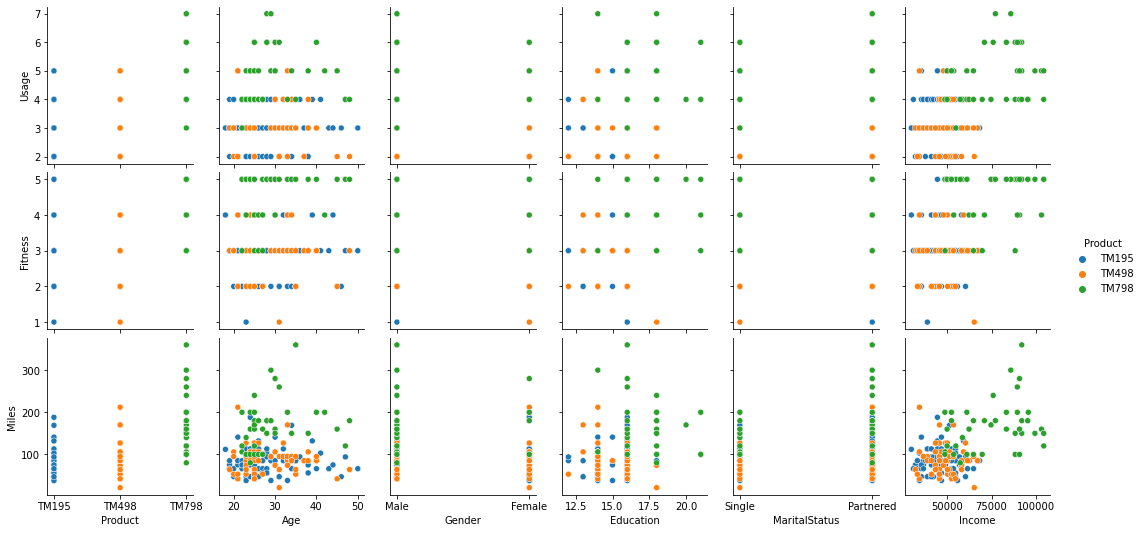

In [41]:
plt.figure()
sns.pairplot(x_vars = ['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Income'],
             y_vars = ['Usage', 'Fitness', 'Miles'],
             hue = 'Product',
             data = df);

From the above array of scatter plots, there are so interesting results. We can see that users of the TM798 (green) typically have higher Usage, Fitness, Miles, Education and Income.

This gives me insight into what to investigate, it is still not that clear and not what I'd want to present to the marketing team.

Lets also look at Age and Gender, as we identified a difference earlier, although the scatter plot above doesn't indicate anything clearly. A Histogram would suit the Age variable, whereas a Bar plot would suit the Gender variable.

Below, I'll create a function that produces several of the graphs of interest, with appropriate visualisations for the data:

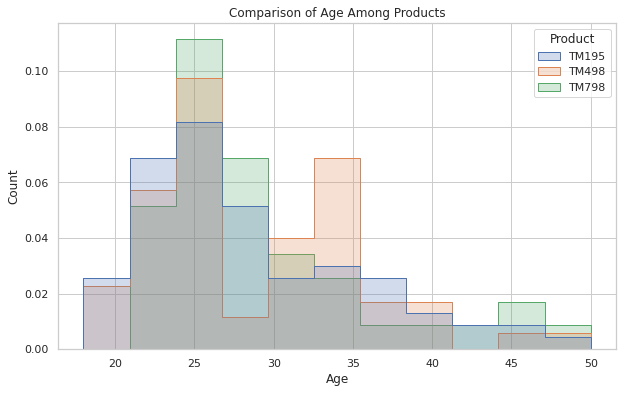

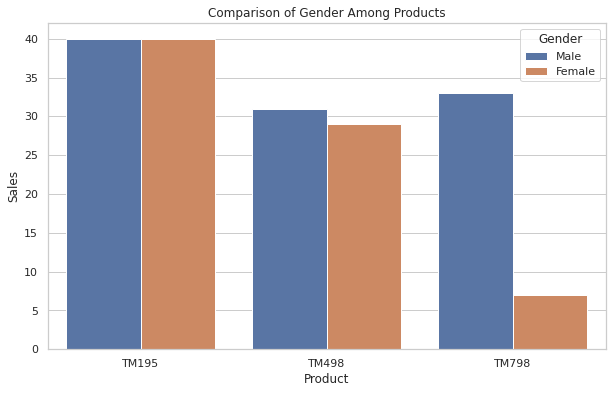

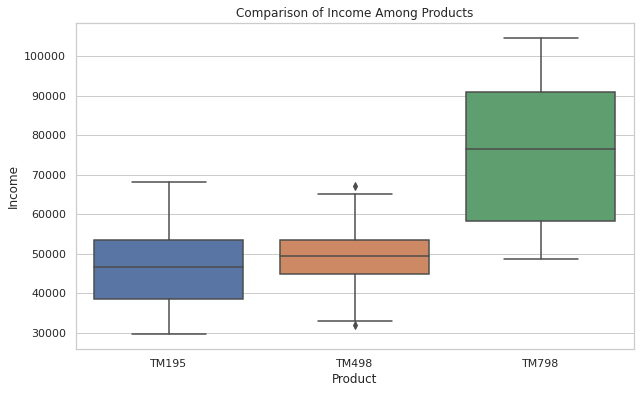

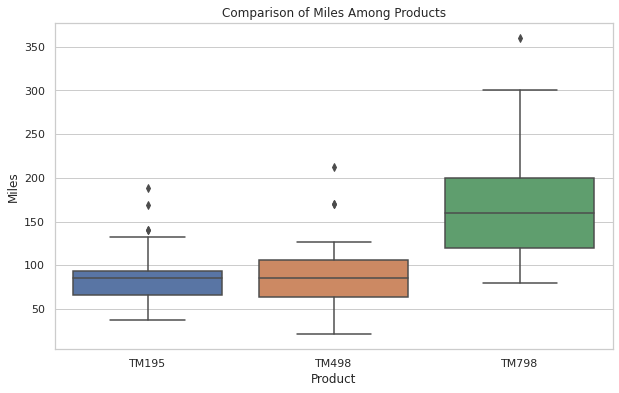

<Figure size 720x432 with 0 Axes>

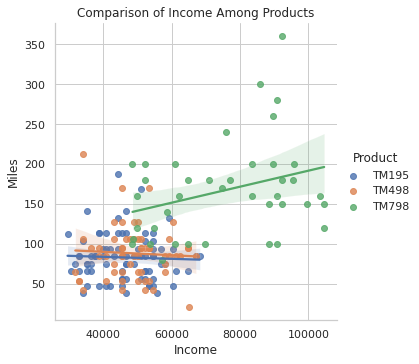

In [65]:
# Setting up the aesthetics for the plots
sns.set(style="whitegrid")
 
# Creating a function to plot the visualizations
def plot_comparisons(df, column, plot_type):
    plt.figure(figsize=(10, 6))
 
    if plot_type == 'histogram':
        sns.histplot(data=df, x=column, hue='Product', element='step', stat='density', common_norm=False)
        plt.ylabel('Count')
        plt.xlabel(column)
    elif plot_type == 'bar':
        sns.countplot(data=df, x='Product', hue=column)
        plt.ylabel('Sales')
        plt.xlabel('Product')
    elif plot_type == 'box':
        sns.boxplot(data=df, x='Product', y=column)
        plt.ylabel(column)
        plt.xlabel('Product')
    elif plot_type == 'scatter':
        sns.lmplot(x=column, y='Miles', data = df, hue = 'Product')
        plt.xlabel(column)
        plt.ylabel('Miles')
 
    plt.title(f'Comparison of {column} Among Products')
    plt.show()
 
# Plotting comparisons
columns_to_plot = ['Age', 'Gender', 'Income', 'Miles', 'Income']
plot_types = ['histogram', 'bar', 'box', 'box', 'scatter']
 
for column, plot_type in zip(columns_to_plot, plot_types):
    plot_comparisons(df, column, plot_type)

We can see in 'Comparison of Age among Products' there is no clear difference between each product, but it is clear that the main purchasers of the Treadmills are between 20 and 35years of age. Also, it must be noted that there are no customers over the age of 50.

When comparing Gender distribution, we can see both the TM195 and TM498 are equally purchased by Male and Female customers, but the TM798 is distinctly purchased by more Males. As quoted earlier, 82.5% of the TM798 owners are Male.

Comparing Income of customers also shows a distinct difference between TM798 customers and those of the other products. It appears that those with much larger incomes are much more likely to purchase the TM798 than other products.

In 'Comparison of Miles among Products' we can see that TM798 users run far more miles on their treadmills than the others. It may be that this treadmill is favoured by more serious athletes.

Next, if we compare Age vs Income, with a Product hue, we can see that Age, Income and Product have a lot of correlation. Its interesting to see that all of the 'lower' income TM798 customers are all in their 20s. This suggests this is a pool of serious athletes, who have invested potentially a higher percentage of their income into this product:

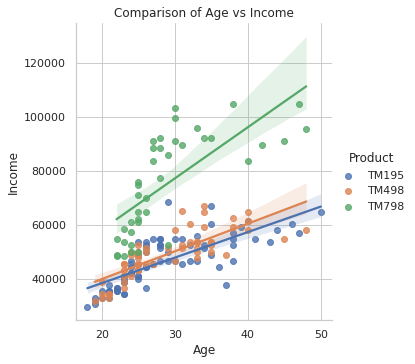

In [59]:
sns.lmplot(x='Age', y='Income', data=df, hue='Product')
plt.title(f'Comparison of Age vs Income')
plt.ylabel('Income')
plt.xlabel('Age')
plt.show()

Finally, lets see how Fitness is rated by Customer of each Product:

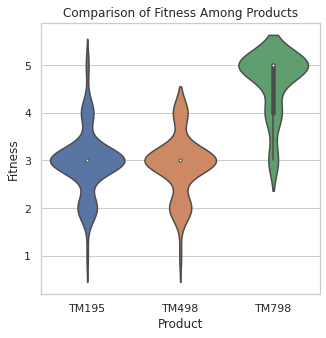

In [71]:
plt.figure(figsize=(5, 5))
sns.violinplot(data=df, y='Fitness', x='Product')
plt.title(f'Comparison of Fitness Among Products')
plt.xlabel('Product')
plt.ylabel('Fitness')
plt.show()

This seems to cement the idea that TM798 users are more serious athletes, as their fitness level is much higher than the other users.

### Recommendations

From the above analysis, I would recommend the following:

We need to improve the marketing of these treadmills towards the over 50s. Currently, noone over 50 is buying these treadmills. At this age, cardiovascular health is extremely important and perhaps the health benefits of running within the comfort of your own home should be targeted to this age group.

Marketing towards higher-income Females is also needed to improve sales of the TM798. There is clearly a gap in the market here, with only 17.5% of the sales going to Females.

Its also clear that more serious athletes are interested in the TM798, as even those with lower incomes but higher Fitness and Mileage are purchasing it. Therefore, these customers may be perfect to target with partner marketing, such as Strava and Fitbit. This could generate more income and retain customers.
